# Cluster Detector Group Images

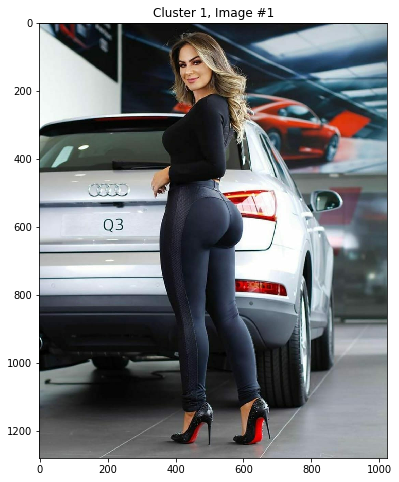

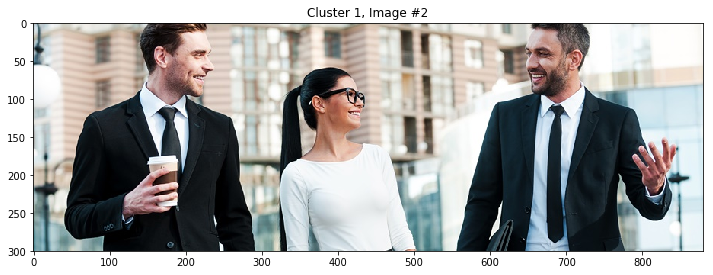

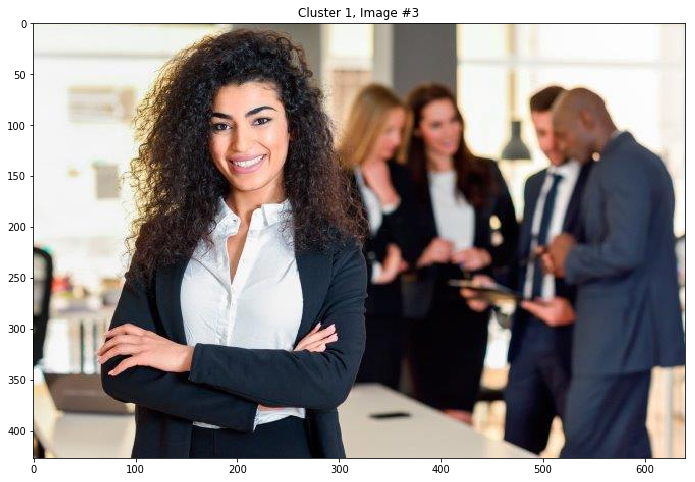

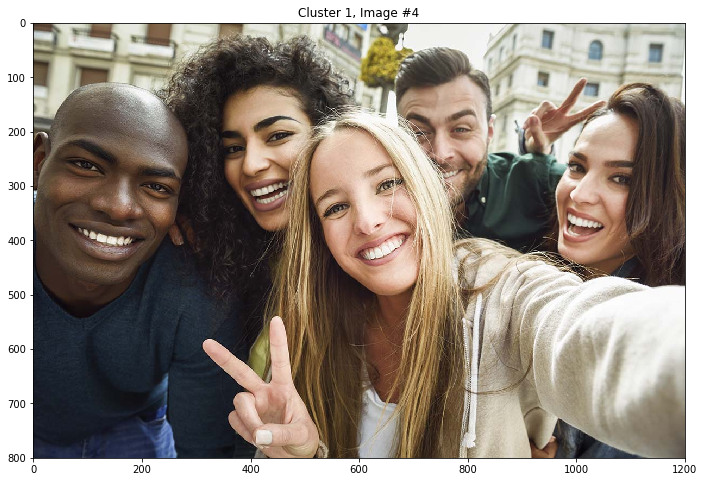

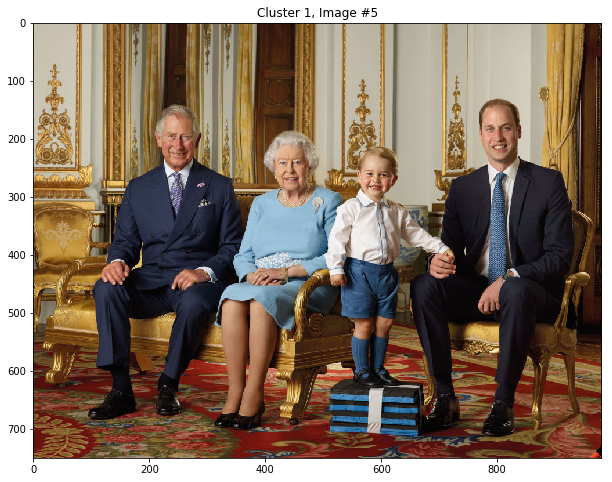

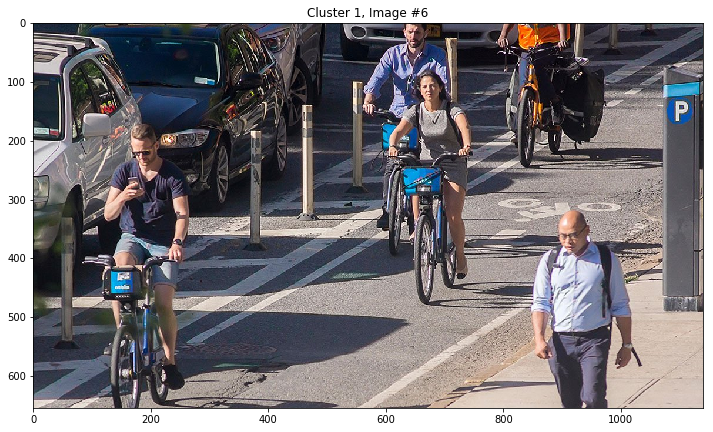

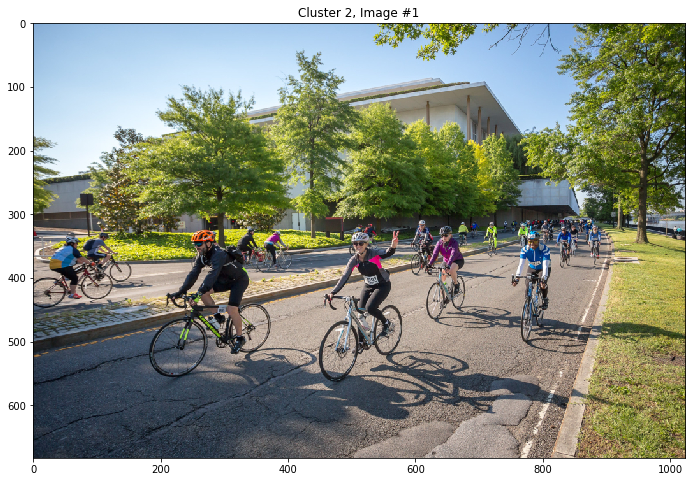

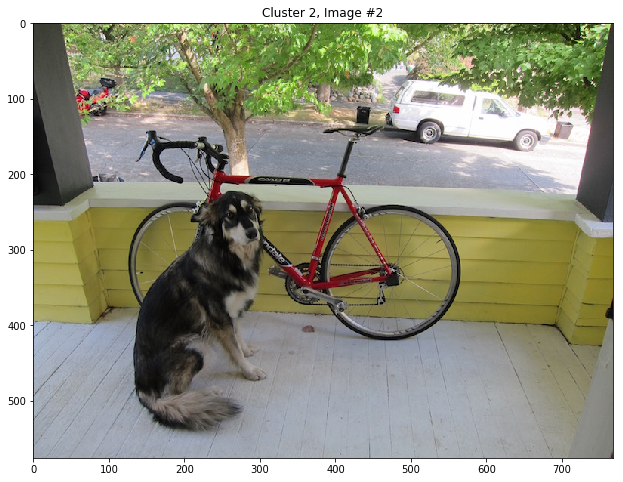

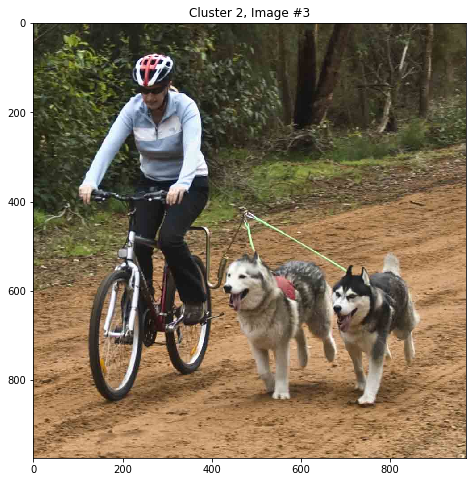

In [1]:
# Clusters
# Para executar este script, use: python cap04-03-cluster_histograms.py --dataset dataset

# Disable jupyter scrolling bar: Cell -> All Outputs ->  toggle scrolling
from matplotlib import pyplot as plt
%matplotlib inline

# Imports
import numpy as np
import cv2
import argparse
from sklearn.cluster import KMeans
from imutils import paths

# Classe
class LabHistogram:
	def __init__(self, bins):
		# Armazena o número de bins no Histograma colunas
		self.bins = bins

	def describe(self, image, mask=None):
		# Converte a imagem para o espaço de cor L*a*b*, calcula um histograma e normaliza
		lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

		# Como mencionado no módulo Iluminação e espaços de cores, a distância euclidiana entre duas cores no L*a*b* 
		# tem um significado perceptivo e notável. E uma vez que o algoritmo de agrupamento k-means assume um espaço euclidiano, 
		# obteremos melhores clusters usando o espaço de cores L*a*b* do que RGB ou HSV.
		hist = cv2.calcHist([lab], [0, 1, 2], mask, self.bins,[0, 256, 0, 256, 0, 256])

		# É muito importante que executemos este passo de normalização. 
		# Se não o fizéssemos, as imagens com exatamente o mesmo conteúdo, mas tamanhos diferentes, 
		# teriam histogramas dramaticamente diferentes. Em vez disso, ao normalizar o nosso histograma, 
		# garantimos que a largura e a altura da nossa imagem de entrada não tenham efeito no histograma de saída.
		hist = cv2.normalize(hist, hist).flatten()

		# Retorna o histograma
		return hist

# Argumentos
#ap = argparse.ArgumentParser() # 'dataset'
#ap.add_argument("-d", "--dataset", default='images', help = "Caminho para o diretório do dataset")
#ap.add_argument("-k", "--clusters", type = int, default = 2, help = "Número de clusters sendo gerados")
#args = vars(ap.parse_args())

# Inicializa o descritor de imagem juntamente com a matriz de imagem
# Como descritores de imagem, os histogramas de cores tendem a ser bastante poderosos. 
# Se decidimos utilizar um histograma de cores 3D com 8 bins por canal, poderíamos representar 
# qualquer imagem de qualquer tamanho usando apenas 8 x 8 x 8 = 512 bins, ou um vetor de características de 512-d. 
# O tamanho de uma imagem não tem efeito em nosso histograma de cores de saída - embora seja sábio redimensionar 
# imagens grandes para dimensões mais gerenciáveis para aumentar a velocidade do cálculo do histograma.
desc = LabHistogram([8, 8, 8])
data = []

# Obtém os caminhos da imagem a partir do diretório do conjunto de dados
imagePaths = list(paths.list_images("images"))
imagePaths = np.array(sorted(imagePaths))

# Loop sobre o conjunto de dados de entrada de imagens
for imagePath in imagePaths:
	# Carrega a imagem, descreve a imagem e, em seguida, atualizar a lista de dados
	image = cv2.imread(imagePath)
	hist = desc.describe(image)
	data.append(hist)

# Agrupa os histogramas de cores
clt = KMeans(n_clusters = 2, random_state = 42)
labels = clt.fit_predict(data)

# Loop sobre os labels únicos
for label in np.unique(labels):
    # Obtém todos os caminhos de imagem atribuídos ao label atual
    labelPaths = imagePaths[np.where(labels == label)]

    # Loop sobre os caminhos da imagem que pertencem ao label atual
    for (i, path) in enumerate(labelPaths):
        # Carregar a imagem e exibi-la
        image = cv2.imread(path)
        #cv2.imshow("Cluster {}, Image #{}".format(label + 1, i + 1), image)

        # correct BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12,8))
        plt.title("Cluster {}, Image #{}".format(label + 1, i + 1))
        plt.imshow(image)



#print(data)
#print(data[0])
#print(hist)

# Aguarde um pressionamento de tecla e feche todas as janelas abertas
#cv2.waitKey(0)
#cv2.destroyAllWindows()